## Saving the Model

In [ ]:
#train model
#model.fit(first_training, first_classes, batch_size=32, nb_epoch=20)

#Save trained model
model.save('NBODM.h5')

## Loading a trained model

In [ ]:
#Load trained model
from keras.models import load_model
model = load_model('NBODM.h5')

## Importing necessary libraries

In [9]:
#imports

import glob2 #for reading file names/paths

#KERAS - for the CNN
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

#numpy and matplotlib
import numpy as np # for reading images and handling matrix operations
import matplotlib.pyplot as plt #plotting lib
import matplotlib
import os
from PIL import Image
from numpy import *
import pandas as pd #
# SKLEARN - for organising the training and testing data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Reading needed data from disk

IMG_8956.JPG  1145 937 1720 1458 1775 1495 350 207 Black SUV/4x4 ر_ر_ع_619

IMG_8958.JPG  418 595 3212 1911 1153 1375 519 277 Black Sedan أ_ه_ه_617

IMG_8959.JPG  1069 771 1851 1865 1787 2105 435 216 ff0080c0 SUV/4x4 ط_ع_ر_7187

IMG_8960.JPG  1221 1163 1737 1440 1897 1740 367 166 ff0080c0 Sedan د_و_و_461

IMG_8961.JPG  595 590 2802 2409 967 1698 574 295 Black SUV/4x4 ه_ر_ج_752



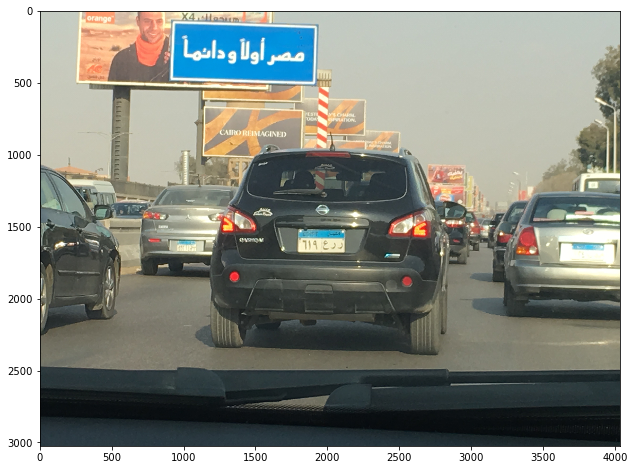

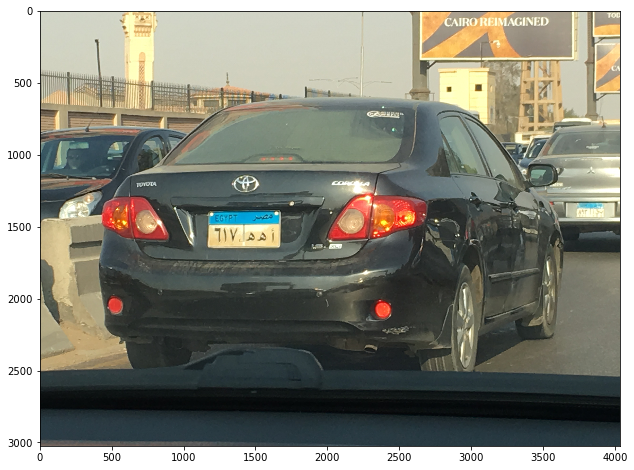

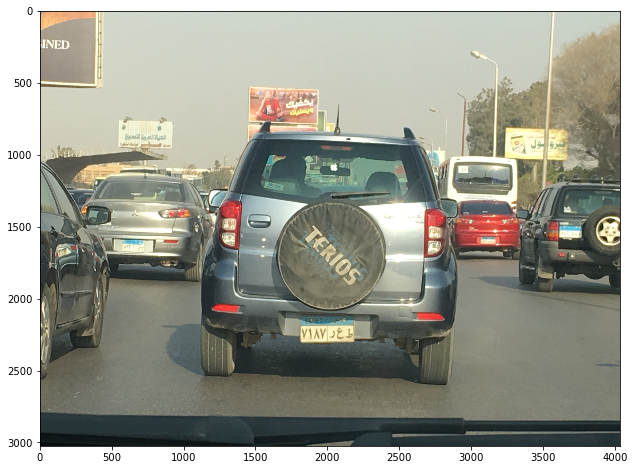

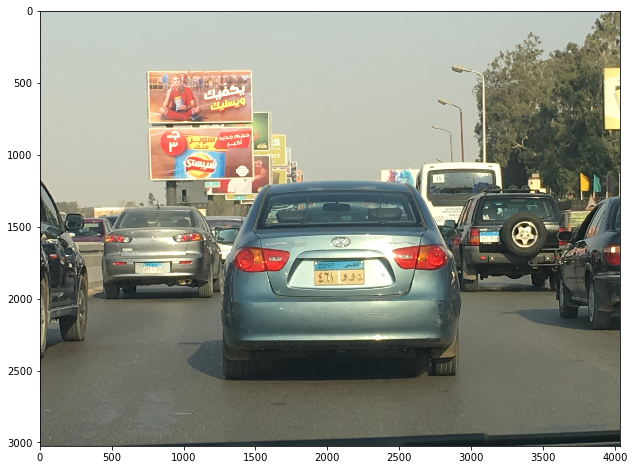

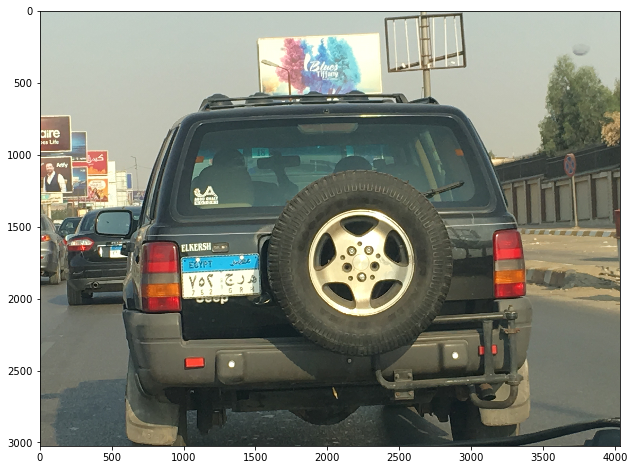

In [18]:
#reading the text files and images
txt_data = [] #list to hold all the text data
img_data = [] #list to hold all images

#the path to the txt data files
file_path = 'Neural_Data/' 
glob_files = glob2.glob(file_path + '*.txt')

#open all the txt files
for file in glob_files:
     with open(file) as f:
        text = f.readline()
        #print(text)
        txt_data.append(text) #store text data in a list
        img_name = text.split()[0] #get the name of the image
        im = Image.open(file_path + img_name) #open the image
        img_data.append(im) #store the image data in a list
        
#show first 5 images
IMG_SIZE= (12, 8) 
for i in range(0, 5):
    plt.figure(figsize=IMG_SIZE)
    plt.imshow(img_data[i])
    print(txt_data[i])
    
plt.show()

## Cleaning the data and preparing it for the CNN

In [35]:
#splitting the text data and putting it into a pandas data frame for easy reading
txt_df = pd.DataFrame({'ImageName': [img_name.split()[0] for img_name in txt_data],
                       'Car_X' : [int(car_x.split()[1]) for car_x in txt_data],
                       'Car_Y' : [int(car_y.split()[2]) for car_y in txt_data],
                       'Car_Width' : [int(car_width.split()[3]) for car_width in txt_data],
                       'Car_Height' : [int(car_height.split()[4]) for car_height in txt_data],
                       'NumPlate_X' : [int(numplate_x.split()[5]) for numplate_x in txt_data],
                       'NumPlate_Y' : [int(numplate_y.split()[6]) for numplate_y in txt_data],
                       'NumPlate_Width' : [int(numplate_width.split()[7]) for numplate_width in txt_data],
                       'NumPlate_Height' : [int(numplate_height.split()[8]) for numplate_height in txt_data],
                       'CarColor' : [car_color.split()[9] for car_color in txt_data],
                       'CarType' : [car_type.split()[10] for car_type in txt_data],
                       'NumPlateNumber' : [numplate_num.split()[11].replace('_', ' ') for numplate_num in txt_data] # show the number plate with spaces here
                      })

# re-arrange the pandas dataframe to be in the correct order
txt_df = txt_df[['ImageName', 'Car_X', 'Car_Y', 'Car_Width', 'Car_Height', 'NumPlate_X', 'NumPlate_Y','NumPlate_Width', 'NumPlate_Height',
                 'CarColor', 'CarType', 'NumPlateNumber']]

#show the first 10 entries
txt_df.head(10)

,ImageName,Car_X,Car_Y,Car_Width,Car_Height,NumPlate_X,NumPlate_Y,NumPlate_Width,NumPlate_Height,CarColor,CarType,NumPlateNumber
0,IMG_8956.JPG,1145,937,1720,1458,1775,1495,350,207,Black,SUV/4x4,ر ر ع 619
1,IMG_8958.JPG,418,595,3212,1911,1153,1375,519,277,Black,Sedan,أ ه ه 617
2,IMG_8959.JPG,1069,771,1851,1865,1787,2105,435,216,ff0080c0,SUV/4x4,ط ع ر 7187
3,IMG_8960.JPG,1221,1163,1737,1440,1897,1740,367,166,ff0080c0,Sedan,د و و 461
4,IMG_8961.JPG,595,590,2802,2409,967,1698,574,295,Black,SUV/4x4,ه ر ج 752
5,IMG_8962.JPG,811,1172,1749,1311,1310,1966,278,166,Silver,Sedan,ب ق أ 893
6,IMG_8963.JPG,1428,1431,1618,1131,2240,1892,274,133,White,Sedan,ج ق ط 452
7,IMG_8964.JPG,346,674,3676,1514,1132,1542,557,300,Red,Hatchback,د ف ج 4389
8,IMG_8967.JPG,570,1412,2100,1518,1065,2008,384,175,Silver,Sedan,ر و ل 197
9,IMG_8968.JPG,1090,1348,1441,1232,1648,2128,308,161,Silver,Sedan,د ه ل 145


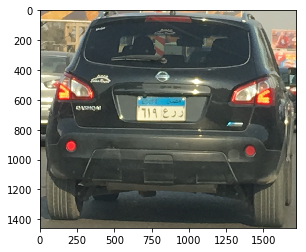

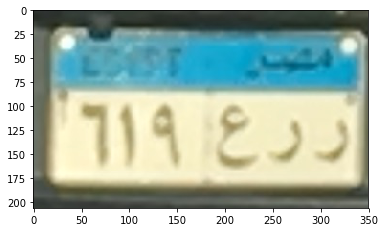

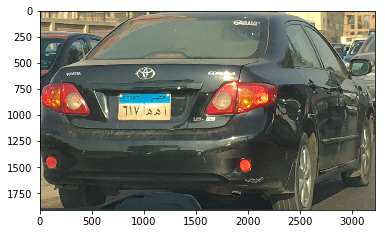

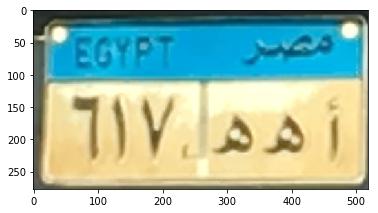

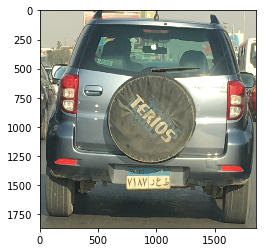

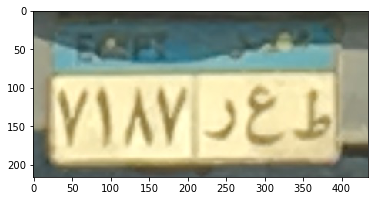

In [43]:
car_imgs = []
numplate_imgs = []

for i in range(0, len(img_data)):
    img = np.array(img_data[i])
    car_x = txt_df['Car_X'][i]
    car_y = txt_df['Car_Y'][i]
    car_width = txt_df['Car_Width'][i] + car_x
    car_height = txt_df['Car_Height'][i] + car_y
    numplate_x = txt_df['NumPlate_X'][i]
    numplate_y = txt_df['NumPlate_Y'][i]
    numplate_width = txt_df['NumPlate_Width'][i] + numplate_x
    numplate_height = txt_df['NumPlate_Height'][i] + numplate_y
    car_img = img[car_y:car_height, car_x:car_width]
    numplate_img = img[numplate_y:numplate_height, numplate_x:numplate_width]
    car_imgs.append(car_img)
    numplate_imgs.append(numplate_img)

#show the first 3 images
IMG_SIZE= (6, 4)  
for i in range(0, 3):
    plt.figure(figsize=IMG_SIZE)
    plt.imshow(car_imgs[i])
    plt.figure(figsize=IMG_SIZE)
    plt.imshow(numplate_imgs[i])

plt.show()